This notebook demonstrates training a gensim's Word2Vec model in a way that expoits the model's capabilities of representing words occuring together with close representations in the embedding space.The word embeddings are visualized with t-SNE.


In [1]:
import warnings
warnings.filterwarnings('ignore')

from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

This training dataset talks about mainly 4 entities while also providing their definitions. The vocabulary is
used with minimum words just like we would do for a naive kid who is starting to learn. With the kind of vocabulary used to define the entities, it is easy to distinguish between them.

It makes sense to do that since, using new vocabulary to define anything to a human (who doesn't know any more words than those provided in the vocabulary introduced to her) would also create an impression that every definition is independent of its own and the person will also find the associated entities completely different from each other.

In [38]:
sentences = ['cat is a mammal with fur four legs a tail and claws kept as a pet',
            'dog is a mammal with four legs a tail kept as a pet or to hunt or guard things',
             'a mammal is an animal like dog or humans have hair or fur',
            'eagle is a large bird of prey with a hooked beak and long broad wings',
            'crow is a large bird with glossy black plumage a heavy beak and a raucous voice',
             'a bird is an animal with feathers wings a beak and can fly']

Preparing training data in the form of list of tokenized sentences required as input for gensim's Word2Vec model for training.

In [39]:
training_data = [word_tokenize(sent) for sent in sentences]

Model training

In [64]:
model = Word2Vec(training_data,min_count=1,seed=6)            # works fine with both skip-gram and cbow training model
type(model)

gensim.models.word2vec.Word2Vec

Obtaining vocabulary as a list of words

In [69]:
vocab = list(model.wv.vocab)

Obtaining a NumPy vector representation of each word in the vocabulary

In [62]:
x = model[vocab]

In [68]:
x.shape

(46, 100)

#### Using t-SNE for visualizing high-dimensional data

t-distributed stochastic neighbourhood embedding method converts similarities between data points to joint probabilities and tries to minimize the Kullback-Liebler divergence between the joint probabilities of the low-dimensinal embedding and the high-dimensional data.This technique reliably embeds closely located high-dimensional word vectors as vectors which are close to each other in 2 dimensional space aslo.

In [48]:
tsne = TSNE(n_components=2)

Obatining 2D representations of the word vectors

In [49]:
reduced_matrix = tsne.fit_transform(x)

Converting the vector matrix into Pandas dataframe

In [50]:
df = pd.DataFrame(reduced_matrix,index=vocab, columns=['x','y'])

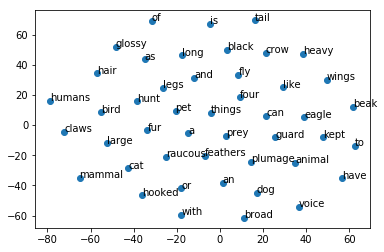

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()    

Word vectors located closeby to a particular entity in the embedding space

In [52]:
model.wv.most_similar('cat')

[('things', 0.2266710102558136),
 ('an', 0.1840348243713379),
 ('have', 0.11740227043628693),
 ('hooked', 0.11077071726322174),
 ('large', 0.1096457839012146),
 ('of', 0.09338793158531189),
 ('or', 0.09179329872131348),
 ('is', 0.08996278047561646),
 ('voice', 0.08193450421094894),
 ('four', 0.07950809597969055)]

In [53]:
model.wv.most_similar("dog")

[('broad', 0.1989930272102356),
 ('an', 0.15907706320285797),
 ('bird', 0.1401815414428711),
 ('hair', 0.13465756177902222),
 ('voice', 0.12854355573654175),
 ('plumage', 0.09753218293190002),
 ('have', 0.0866154208779335),
 ('can', 0.08360810577869415),
 ('a', 0.0800592452287674),
 ('heavy', 0.07070364058017731)]

In [54]:
model.wv.most_similar("eagle")

[('guard', 0.24178168177604675),
 ('kept', 0.23465438187122345),
 ('can', 0.18545672297477722),
 ('humans', 0.14576897025108337),
 ('beak', 0.14217688143253326),
 ('bird', 0.0990469679236412),
 ('voice', 0.08126670122146606),
 ('tail', 0.07026726752519608),
 ('claws', 0.06882186233997345),
 ('to', 0.05633120983839035)]

In [55]:
model.wv.most_similar("crow")

[('black', 0.19964396953582764),
 ('prey', 0.192592591047287),
 ('heavy', 0.164266899228096),
 ('fur', 0.1475100815296173),
 ('long', 0.13782013952732086),
 ('feathers', 0.12547951936721802),
 ('is', 0.12098678201436996),
 ('can', 0.12000662088394165),
 ('humans', 0.10736741125583649),
 ('glossy', 0.09908254444599152)]

Cosine similarity between cat and dog

In [74]:
cosine_similarity(model['cat'].reshape(1,-1),model['dog'].reshape(1,-1))

array([[-0.04492159]], dtype=float32)

Cosine similarity between cat and eagle

In [57]:
cosine_similarity(model['cat'].reshape(1,-1),model['crow'].reshape(1,-1))

array([[-0.05000591]], dtype=float32)

Is similarity between cat and dog greater than cat and eagle?

In [58]:
cosine_similarity(model['cat'].reshape(1,-1),model['dog'].reshape(1,-1)) > \
cosine_similarity(model['cat'].reshape(1,-1),model['crow'].reshape(1,-1))

array([[ True]])

Cosine similarity between eagle and crow

In [59]:
cosine_similarity(model['eagle'].reshape(1,-1),model['crow'].reshape(1,-1))

array([[-0.08505214]], dtype=float32)

Cosine similarity between eagle and dog

In [60]:
cosine_similarity(model['eagle'].reshape(1,-1),model['dog'].reshape(1,-1))

array([[-0.12201466]], dtype=float32)

Is similarity between eagle and crow greater than eagle and dog?

In [61]:
cosine_similarity(model['eagle'].reshape(1,-1),model['crow'].reshape(1,-1)) >\
cosine_similarity(model['eagle'].reshape(1,-1),model['dog'].reshape(1,-1))

array([[ True]])